In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import shutil

In [14]:
SOURCE_DIR = './data/'
TARGET_DIR = './data/'

def prepare_dataset(source_dir, target_dir, test_size=0.1, val_size=0.1, seed=42):
    classes = ['with_mask', 'without_mask']
    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        images = os.listdir(class_path)

        # Split dataset
        train_val, test = train_test_split(images, test_size=test_size, random_state=seed)
        train, val = train_test_split(train_val, test_size=val_size / (1 - test_size), random_state=seed)

        # Copy files
        for split_name, split_data in [('train', train), ('val', val), ('test', test)]:
            split_dir = os.path.join(target_dir, split_name, class_name)
            os.makedirs(split_dir, exist_ok=True)

            for img in split_data:
                src = os.path.join(class_path, img)
                dst = os.path.join(split_dir, img)
                shutil.copy(src, dst)

# Call the function
prepare_dataset(SOURCE_DIR, TARGET_DIR, test_size=0.04, val_size=0.04)

In [2]:
train_dir='./Data/train'
test_dir='./Data/train'
validation_dir='./Data/val'
img_size = 128
bat_size = 32

train_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    image_size=(img_size, img_size),
    batch_size=bat_size,
    color_mode="rgb",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

classes = train_generator.class_names
print(f"{classes}")



validation_generator = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    image_size=(img_size, img_size),
    batch_size=bat_size,
    color_mode="rgb",
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_generator = tf.keras.utils.image_dataset_from_directory(
        test_dir ,
        labels = "inferred",
        image_size=(img_size, img_size),
        batch_size=bat_size,
        color_mode='rgb'
)
train_ds = train_generator.map(lambda x,y : (x/255,y))
validation_ds = validation_generator.map(lambda x,y : (x/255,y))
test_ds = test_generator.map(lambda x,y : (x/255,y))

Found 6946 files belonging to 2 classes.
Using 5557 files for training.
['with_mask', 'without_mask']
Found 304 files belonging to 2 classes.
Using 60 files for validation.
Found 6946 files belonging to 2 classes.


In [34]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid'))


C:\Users\ADITYA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,337,921 (12.73 MB)

 Trainable params: 3,337,921 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
model.fit(train_ds,validation_data=validation_ds,epochs=22,verbose=1)

Epoch 1/22


174/174 ━━━━━━━━━━━━━━━━━━━━ 73s 401ms/step - accuracy: 0.6950 - loss: 0.5809 - val_accuracy: 0.8167 - val_loss: 0.4629
Epoch 2/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 383ms/step - accuracy: 0.8837 - loss: 0.3045 - val_accuracy: 0.8667 - val_loss: 0.4230
Epoch 3/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 383ms/step - accuracy: 0.8913 - loss: 0.2710 - val_accuracy: 0.8667 - val_loss: 0.3896
Epoch 4/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 68s 388ms/step - accuracy: 0.9090 - loss: 0.2188 - val_accuracy: 0.8833 - val_loss: 0.4075
Epoch 5/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 383ms/step - accuracy: 0.9135 - loss: 0.2205 - val_accuracy: 0.8500 - val_loss: 0.3845
Epoch 6/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 382ms/step - accuracy: 0.9277 - loss: 0.1904 - val_accuracy: 0.8500 - val_loss: 0.3445
Epoch 7/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 380ms/step - accuracy: 0.9353 - loss: 0.1741 - val_accuracy: 0.8833 - val_loss: 0.4123
Epoch 8/22
174/174 ━━━━━━━━━━━━━━━━━━━━ 67s 383ms/step - accuracy: 0.9422 - loss: 0.1634 - val

In [6]:

loss , accuracy     = model.evaluate(test_ds)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

218/218 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9880 - loss: 0.0452
Test Loss: 0.042161814868450165, Test Accuracy: 0.9890584349632263


In [7]:
y_true = []
images = []
for image, label in test_ds:
    y_true.extend(label.numpy())
    images.extend(image.numpy())

In [8]:
y_pre = model.predict(np.array(images))
y_pred = (y_pre > 0.5).astype("int32").flatten()

218/218 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step


<Axes: >

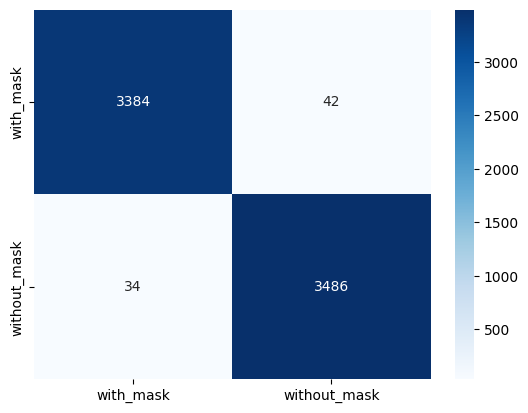

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_true, y_pred) , annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)

In [12]:
model.save('Face_mask_98.90%.h5')